In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


**OLS**

In [ ]:
df = pd.read_csv("base_economía.csv")

In [ ]:
df.columns


Index(['Y', 'CP', 'R', 'P', 'S', 'W', 'PROD', 'M2', 'M3', 'Z'], dtype='object')

In [ ]:
df.describe()

,Y,CP,R,P,S,W,PROD,M2,M3,Z
count,3.100000e+01,3.100000e+01,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01,3.100000e+01,31.000000
mean,1.295622e+07,8.968223e+06,18.510565,63.525903,9.740119,157.358723,97.268481,4.317361e+06,4.871881e+06,66789.064516
std,2.916016e+06,2.314057e+06,21.328048,39.139293,5.041613,104.183955,4.390484,4.102579e+06,4.916511e+06,33568.457756
min,8.253876e+06,5.161264e+06,3.037500,3.528438,2.284000,13.237734,87.532568,7.984077e+04,8.027627e+04,27011.000000
25%,1.041672e+07,6.784860e+06,5.915000,22.447133,5.864150,55.059868,94.647400,6.545960e+05,7.207263e+05,38000.000000
50%,1.293292e+07,9.245656e+06,9.210000,69.114079,10.395000,163.196667,97.990982,3.056567e+06,3.081821e+06,60641.000000
75%,1.498069e+07,1.089322e+07,21.038750,95.762391,12.976200,244.325833,100.289045,6.940069e+06,7.502515e+06,85172.000000
max,1.814779e+07,1.281543e+07,106.677500,127.219083,20.640000,333.230000,104.204376,1.367846e+07,1.599269e+07,143626.000000


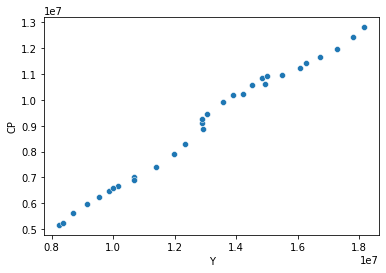

In [ ]:
#Mostramos la tendencia de nuetras columnas seleccionadas
sns.scatterplot(x="Y", y="CP", data = df)

In [ ]:
#CP = alfa + beta * y

In [ ]:
#Creamos un modelo, con la formula donde "CP" esta relacionado con "Y"
modelo = smf.ols(formula="CP ~ Y", data = df).fit()

In [ ]:
print(modelo.summary())
#R-squared: Porcentaje de ajuste
#Intercept: Son los coeficientes que necesita nuestro modelo.
#Intercept: Valor del intervalo
#P>|t|: Prueba de hipotisis - .50 ()


                            OLS Regression Results                            
Dep. Variable:                     CP   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     2199.
Date:                Mon, 10 May 2021   Prob (F-statistic):           6.73e-29
Time:                        16:21:40   Log-Likelihood:                -430.47
No. Observations:                  31   AIC:                             864.9
Df Residuals:                      29   BIC:                             867.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.246e+06   2.23e+05     -5.587      0.0

In [ ]:
#CP = -1.246e+06 + 0.7884*Y

#alfa: si el ingreso es cero, el pais no consumira.
#beta: Si el ingreso en 1 Millon el consumo aumentara en 0.7

Consumo Privado = Modelos de Regresion

CP = a + bY
CP = a + b1Y + b2Y + bY
CP = 

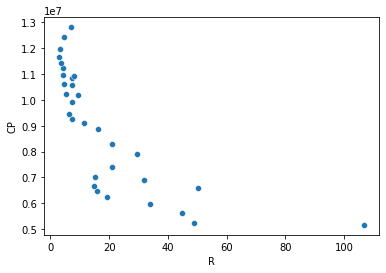

In [ ]:
#Analizar la relaion entre el consumo privado (CP) y la tasa de interes(R)
sns.scatterplot(x="R", y="CP", data = df)

In [ ]:
lm1 = smf.ols(formula = "CP ~ R", data = df).fit()
print(lm1.summary())

#R-squared: El modelo ajusta al 54% de los datos.
#AIC: Bayesiano

                            OLS Regression Results                            
Dep. Variable:                     CP   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     34.45
Date:                Mon, 10 May 2021   Prob (F-statistic):           2.28e-06
Time:                        16:21:40   Log-Likelihood:                -485.63
No. Observations:                  31   AIC:                             975.3
Df Residuals:                      29   BIC:                             978.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.045e+07   3.81e+05     27.414      0.0

In [ ]:
# CP = 0.145e+07 - 7.995e+04*RecursionError

Alfa: Si la tasa de interes es cera el consumo privado sera de 10,000,000.00 \\
Beta: Un aumento de 1 punto en la tasa de interés, tendra un efecto 

In [ ]:
df['ln_R'] = np.log(df['R'])

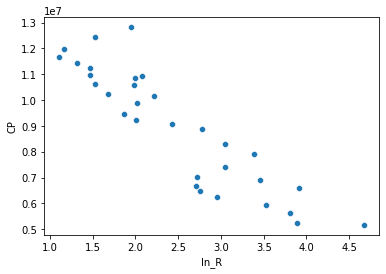

In [ ]:
sns.scatterplot(x='ln_R', y = 'CP', data=df)

In [ ]:
#Metodos para suavizar los datos. 
#Calculamos el logaritmo natural para hacer nuestro modelo mas lineal
#Con logaritmo natural de "R"
m_lnR = smf.ols(formula = "CP ~ ln_R", data = df).fit()
print(m_lnR.summary())

#Obtenemos un modelo que esta mejor ajustado (:

                            OLS Regression Results                            
Dep. Variable:                     CP   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     129.9
Date:                Mon, 10 May 2021   Prob (F-statistic):           3.12e-12
Time:                        16:21:40   Log-Likelihood:                -471.40
No. Observations:                  31   AIC:                             946.8
Df Residuals:                      29   BIC:                             949.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.453e+07    5.2e+05     27.936      0.0

In [ ]:
#Modelo con un ajuste del 98%

In [ ]:
m_Y = smf.ols(formula="CP ~ Y", data = df).fit()

In [ ]:
c = [1000000, 5000000, 25000000]
val = pd.DataFrame(c, columns= ["Y"])

In [ ]:
 val

,Y
0,1000000
1,5000000
2,25000000


In [ ]:
m_Y.predict(val)

0   -4.579136e+05
1    2.695637e+06
2    1.846339e+07
dtype: float64

In [ ]:
m_all =  smf.ols(formula= 'CP ~ Y + P + S + R + M2 + M3 + PROD + ln_R', data=df).fit()
print(m_all.summary())

# P>|t| = Esta variable debe ajustar a menos de 0.05

                            OLS Regression Results                            
Dep. Variable:                     CP   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1685.
Date:                Mon, 10 May 2021   Prob (F-statistic):           7.81e-29
Time:                        16:21:40   Log-Likelihood:                -398.27
No. Observations:                  31   AIC:                             814.5
Df Residuals:                      22   BIC:                             827.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.452e+06   8.82e+05     -2.779      0.0

In [ ]:
semi_all =  smf.ols(formula= 'CP ~ Y  + M2 + M3 + PROD ', data=df).fit()
print(semi_all.summary())

                            OLS Regression Results                            
Dep. Variable:                     CP   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2229.
Date:                Mon, 10 May 2021   Prob (F-statistic):           1.48e-32
Time:                        16:21:40   Log-Likelihood:                -407.24
No. Observations:                  31   AIC:                             824.5
Df Residuals:                      26   BIC:                             831.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.292e+06   8.26e+05     -5.196      0.0

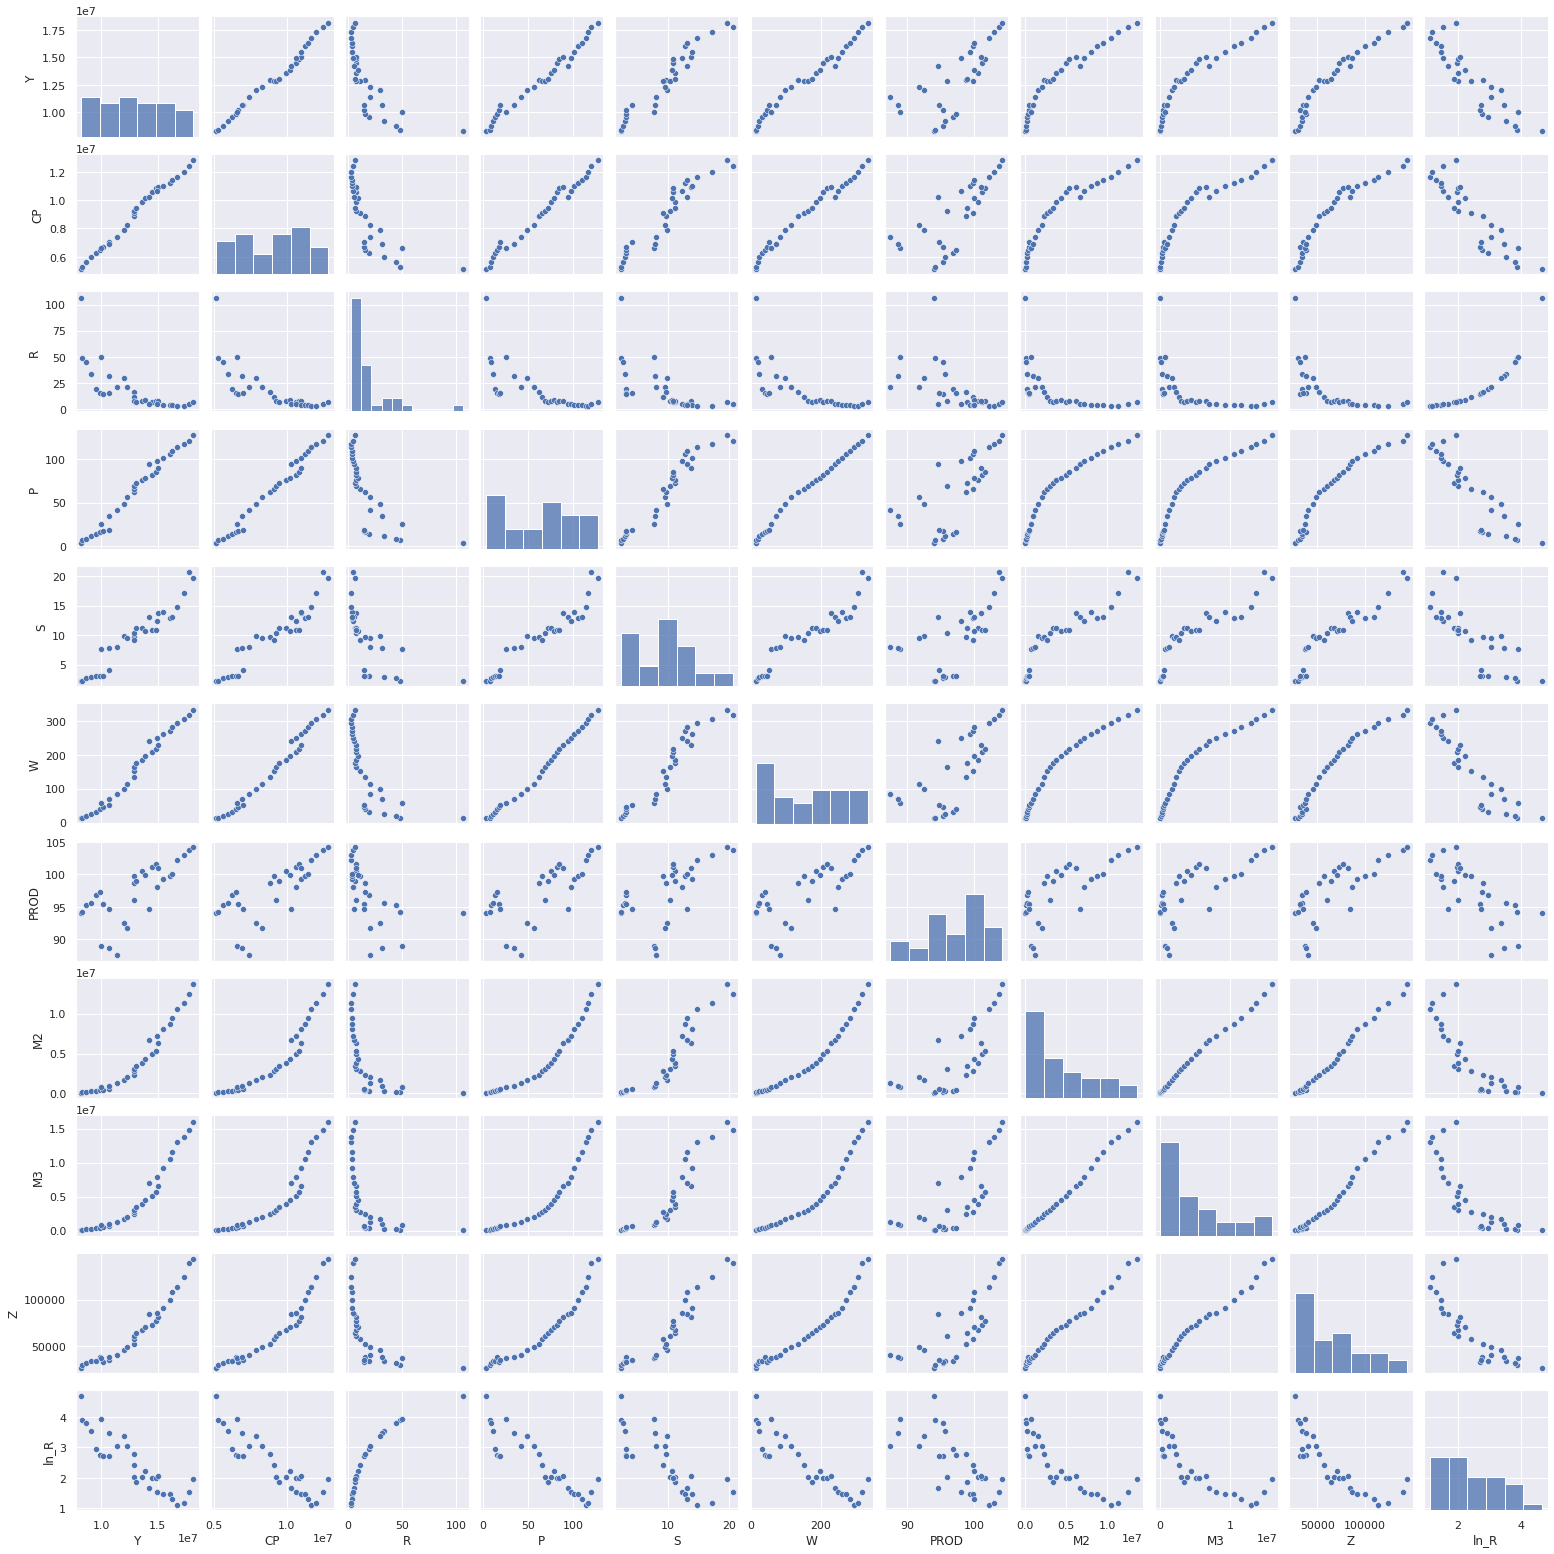

In [ ]:
sns.set()
cols = list(df.columns)
sns.pairplot(df[cols], height = 2)

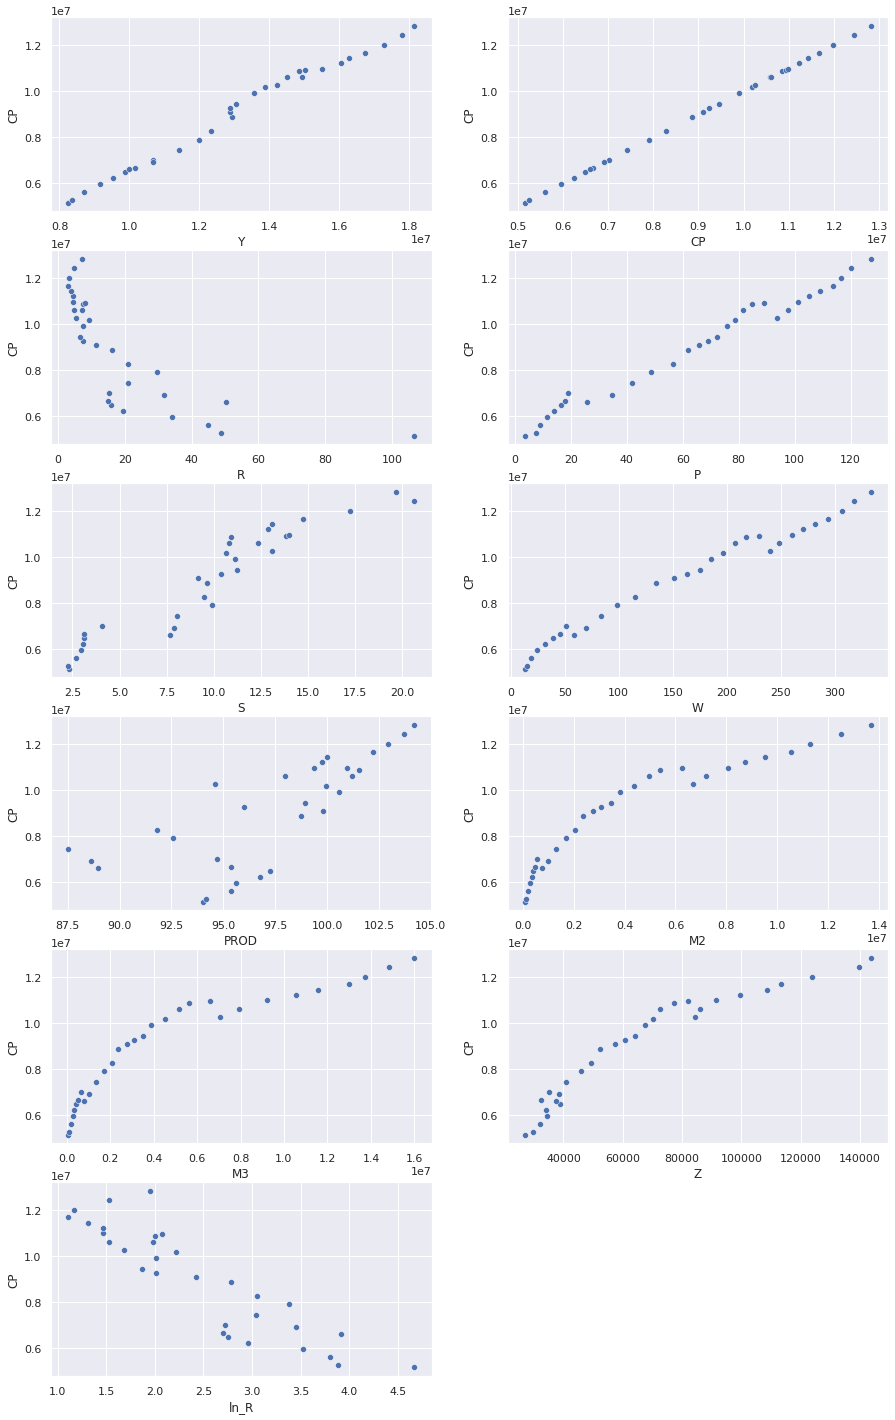

In [ ]:
#Creamos una figura para mostrar nuestros datos
plt.figure(figsize=(15,25)) 

for i, col in enumerate(cols):
  ax = plt.subplot(6,2,i+1)
  sns.scatterplot(x=df[col], y=df["CP"], data=df)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modelo = LinearRegression(x=("Y"), y=df("CP"), data=df)

TypeError: ignored

In [ ]:
def fit_linear_reg(x,y):
  #Fit
  model_k = LinearRegression()
  model_k.fit(x,y)
  RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
  R_squared = model_k.score(x,y)
  return R_squared

In [ ]:
#Ayuda a hacer nuestro modelo por rango, y combinamos nuestras variables
from tqdm import tnrange, tqdm_notebook
#Librerias para hacer las combinaciones posibles entre variables
from itertools import combinations 
from sklearn.metrics import mean_squared_error

In [ ]:
Y = df.CP
X = df.drop(columns = 'CP', axis = 1)
k = 11
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

In [ ]:
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo)) 
         


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [ ]:
y = df.CP
#Con esta funcion eliminamos la columna que no utilizamos.
x = df.drop(columns="CP", axis=1)
k = 1

#Creamos nuestras listas
SEC_list = []
var_list = []
nom_vars = []


ValueError: ignored